In [1]:
import torch
from torch_geometric.datasets import BA2MotifDataset
from torch_geometric.data import DataLoader

dataset = BA2MotifDataset(root='data/BA2Motif')

In [18]:
dataset[0].x

tensor([[0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000, 0.1000,
         0.1000],
        [0

In [7]:
import numpy as np
from torch_geometric.data import Data
from torch_geometric.utils import to_networkx
import random

def permute_graph(data):
    num_nodes = data.num_nodes
    perm = list(range(num_nodes))
    random.shuffle(perm)
    mapping = {node: i for i, node in enumerate(perm)}
    print(mapping)
    
    edge_index = data.edge_index.clone()
    edge_index[0] = torch.tensor([mapping[node] for node in edge_index[0].tolist()])
    edge_index[1] = torch.tensor([mapping[node] for node in edge_index[1].tolist()])
    
    x = data.x.clone()
    x = x[perm]

    permuted_data = data.clone()
    permuted_data.edge_index = edge_index
    permuted_data.x = x
    return permuted_data

In [12]:
graph = dataset[0]
perm_graph = permute_graph(graph)

{21: 0, 13: 1, 23: 2, 11: 3, 14: 4, 1: 5, 20: 6, 17: 7, 3: 8, 4: 9, 22: 10, 8: 11, 6: 12, 9: 13, 10: 14, 15: 15, 18: 16, 5: 17, 0: 18, 2: 19, 7: 20, 24: 21, 16: 22, 19: 23, 12: 24}


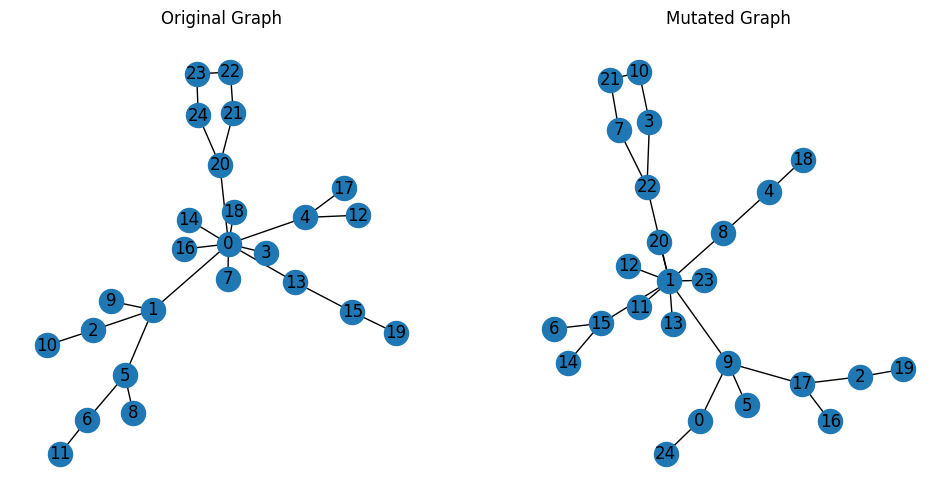

In [19]:
from torch_geometric.utils import to_networkx
import networkx as nx
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title("Original Graph")
G_original = to_networkx(graph, to_undirected=True)
nx.draw(G_original, with_labels=True)

plt.subplot(122)
plt.title("Mutated Graph")
G_permutated = to_networkx(perm_graph, to_undirected=True)
nx.draw(G_permutated, with_labels=True)
plt.show()

In [25]:
x = [[0, 1, 0, 0, 1, 0],
     [1, 0, 0, 1, 0, 0],
     [0, 0, 1, 0, 1, 0],
     [0, 1, 0, 0, 0, 1]]
A = np.array(x)
G = A[[1,1,1,3]]

G

array([[1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 1]])